<H1>K-means clustering</H1>
The k-means clustering is a form of in unsupervised learning. The k-means clustering divide n observations into k clusters in which each observation belongs to the cluster with the closest mean (centroid). 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# generate some data
def create_cluster(npoints, n_clusters):
    """
    create clustered data
    Arguments:
    
    ncluster -- (int) number of clusters
    npoints  -- (int) number of data points in every cluster
    
    Returns a 2D NumPy array of shape npoints, 2
    """
    np.random.seed(10)
  
    datax, datay = list(), list()
    for _ in range(n_clusters):
        dY = np.random.uniform(low = 20e3, high = 200e3) # dispersion in X
        dX = np.random.uniform(low = 20.0, high = 70.0) # dispersion in Y
        datax.append( np.random.normal(loc = dX, scale = 2.0 , size = npoints) )
        datay.append( np.random.normal(loc = dY, scale = 10e3, size = npoints) )

    X, Y = np.concatenate(datax), np.concatenate(datay)
    return np.array([X,Y]).T
            

data = create_cluster(npoints = 20, n_clusters = 5)
data.shape

(100, 2)

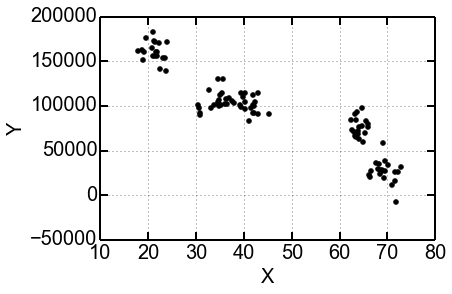

In [3]:
plt.plot(data[:,0], data[:,1], 'ko', markersize=5);
plt.xlabel('X'), plt.ylabel('Y');

In [4]:
from sklearn.cluster import KMeans

[4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 2 2 2 2 2 4 4 2 2 2 4 2 2 2 2 2 2 2 2 2 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 2 2 4 2 2 2 2 2 4 4 2 4 2 2 4 2 2 2 1]


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


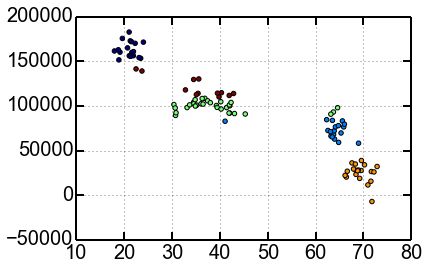

In [5]:
mymodel = KMeans(n_clusters=5)

# Note I'm scaling the data to normalize it! Important for good results.
mymodel.fit(data)

# We can look at the clusters each data point was assigned to
print mymodel.labels_ 

# And we'll visualize it:

plt.scatter(data[:,0], data[:,1], c=mymodel.labels_.astype(float));

<H2> Normalizing the data</H2>
To account for the differences mean values of the data, we normalize the vector

In [6]:
from sklearn.preprocessing import scale

In [7]:
x = np.random.normal(loc=10, scale=2, size=10)
print('[Data]-> Mean = %2.4f, StDev = %2.4f'% (x.mean(), x.std()))
y = scale(x)
print('[Norm]-> Mean = %2.4f, StDev = %2.4f'%(y.mean(), y.std()) )

[Data]-> Mean = 10.2680, StDev = 2.7965
[Norm]-> Mean = -0.0000, StDev = 1.0000


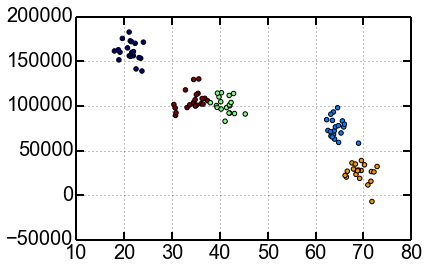

In [8]:
mymodel.fit(scale(data))
plt.scatter(data[:,0], data[:,1], c=mymodel.labels_.astype(float));